In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import log
import scipy.stats as stats
import pylab

In [2]:
# Loading the data
df = pd.read_csv('./data/data_wrangling.csv')
pd.set_option('display.max_columns', len(df.columns))

In [3]:
# Checking the data
df.head()

,reactor_energy,dissolved_oxygen,dissolved_oxygen_outlet,rotors_depth_level,turbidity,outlet_temp,reactor_temp,ras_tss,was_station,feedflow_to_reactor,raw_sewage_conductivity,raw_sewage_tss,pH,b11_flowmeter,ammonia_outlet_conc,nitrate_outlet_conc
0,520.0,0.569,0.366,27.751,2.565,23.298,21.930,4.841,404.409,4629.0,1339.601,464.343,7.262,848.0,5.812,5.946
1,671.0,0.400,2.026,27.751,1.944,26.313,25.270,10.693,373.377,5986.0,981.461,453.370,6.961,460.0,10.073,4.420
2,660.0,0.405,0.366,28.240,1.812,26.312,25.267,10.562,373.292,5831.0,983.918,455.011,6.954,460.0,10.134,4.408
3,678.0,0.569,0.366,27.726,1.758,26.310,25.265,10.756,373.265,5564.0,984.421,456.060,6.950,476.0,10.208,4.371
4,656.0,0.366,2.025,27.751,1.856,26.309,25.263,10.759,373.189,5898.0,993.283,459.889,6.954,880.0,10.281,4.359


In [4]:
# Getting information abot data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877464 entries, 0 to 877463
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   reactor_energy           877464 non-null  float64
 1   dissolved_oxygen         877464 non-null  float64
 2   dissolved_oxygen_outlet  877464 non-null  float64
 3   rotors_depth_level       877464 non-null  float64
 4   turbidity                877464 non-null  float64
 5   outlet_temp              877464 non-null  float64
 6   reactor_temp             877464 non-null  float64
 7   ras_tss                  877464 non-null  float64
 8   was_station              877464 non-null  float64
 9   feedflow_to_reactor      877464 non-null  float64
 10  raw_sewage_conductivity  877464 non-null  float64
 11  raw_sewage_tss           877464 non-null  float64
 12  pH                       877464 non-null  float64
 13  b11_flowmeter            877464 non-null  float64
 14  ammo

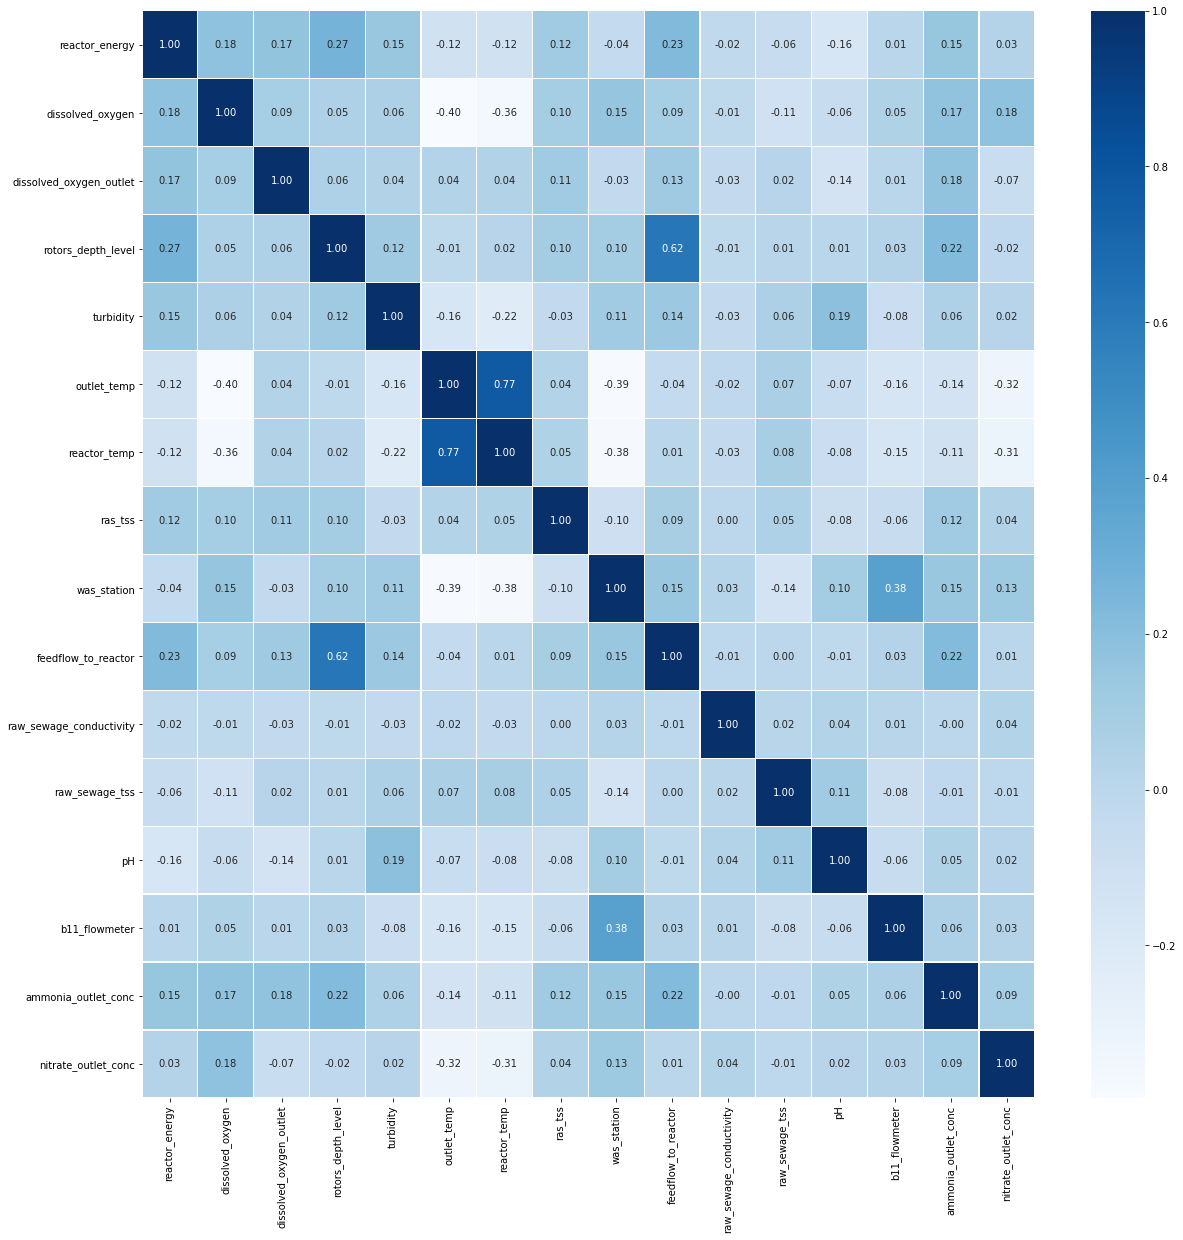

In [5]:
# Plotting the correlation heatmap
dfcorr = df.corr()
fig,ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(dfcorr, annot= True,fmt = '.2f', lw = 0.2, cmap = 'Blues')

From the coorelation heatmap, it is evident that ammonia_outlet_conc depends on various factors like reactor_energy, dissolved_oxygen, dissolved_oxygen_outlet, rotors_depth_level, feedflow_to_reactor, was_station and rss_tss. Whereas, nitrate_outlet_concentration depends on dissolved_oxygen, was_station.

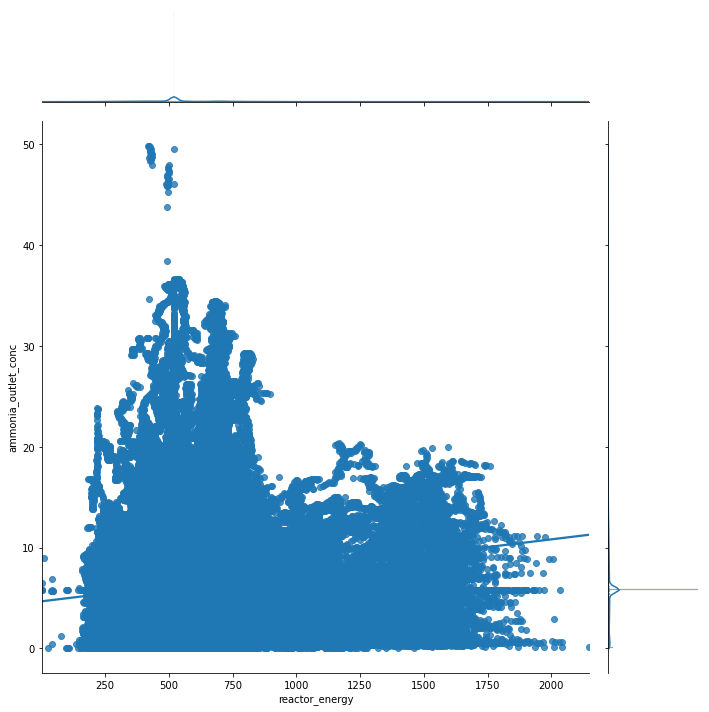

In [6]:
# Plotting the ammonia outlet concentration and reactor energy
sns.jointplot(x='reactor_energy',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

It is clear that ammonia outlet concentration is distrubuted as per reactor_energy with ammonia_outlet_conc highest when reactor_energy is between 450 and 750 KWh

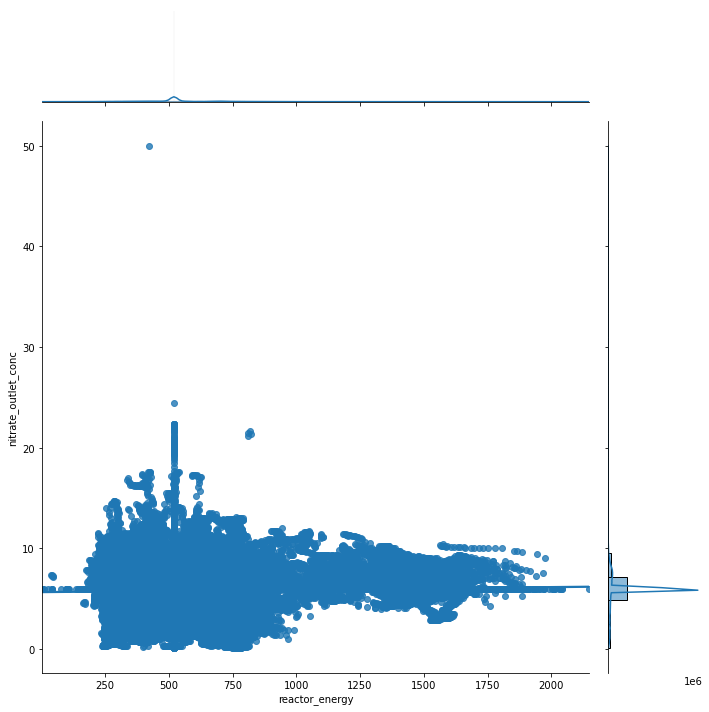

In [7]:
# Plotting the nitrate outlet concentration and reactor energy
sns.jointplot(x='reactor_energy',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

From the graph it is clear that nitrate outlet concentration is maximumwhen reactor_energy is between 250 and 750 KWh

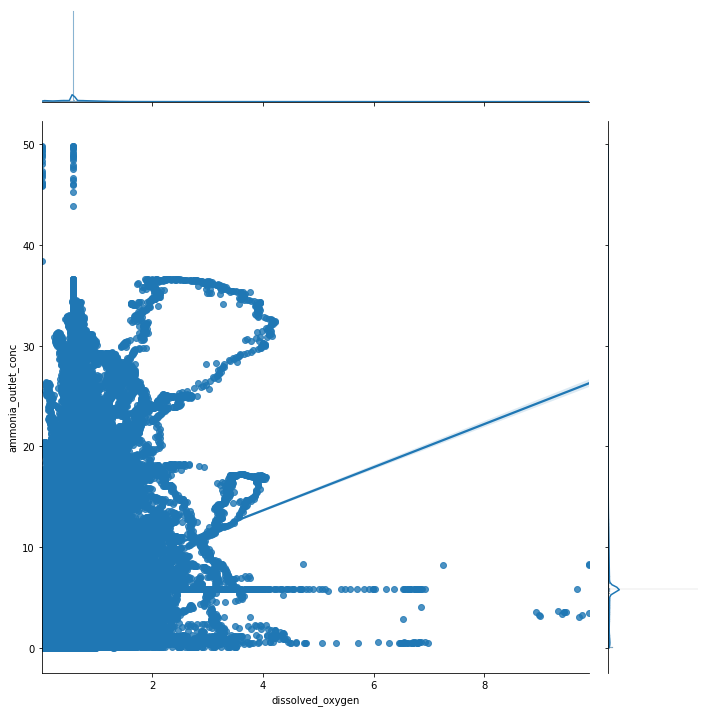

In [8]:
# Plotting the ammonia_outlet_concentration and dissolved_oxygen
sns.jointplot(x='dissolved_oxygen',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

It is evident that less the dissolved_oxygen, more is ammonia_outlet_concentration. Thus more dissolved_oxygen is required to control ammonia_outlet_concentration.

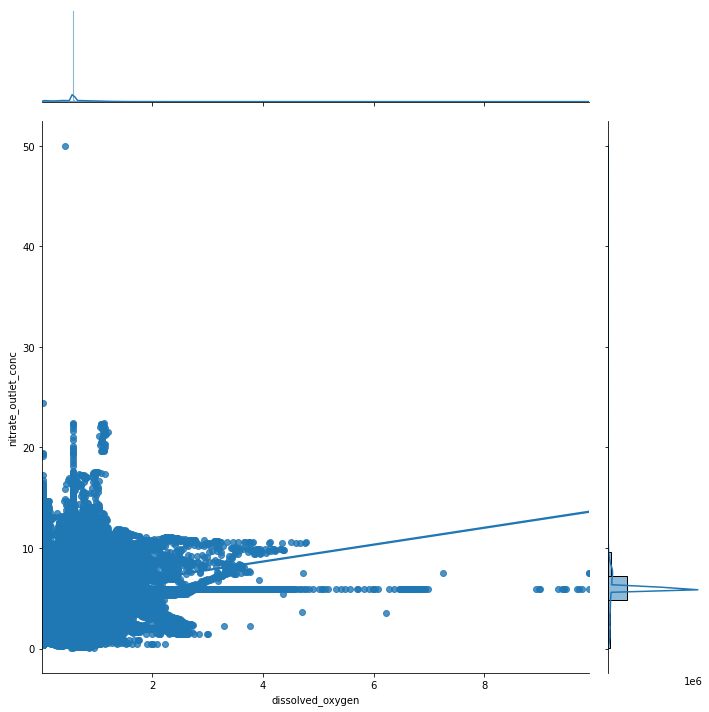

In [9]:
# Plot nitrate_outlet_concentration with dissolved_oxygen 
sns.jointplot(x='dissolved_oxygen',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

It is clear that high dissolved_oxygen is crucial for controlling nitrate_outlet_concentration

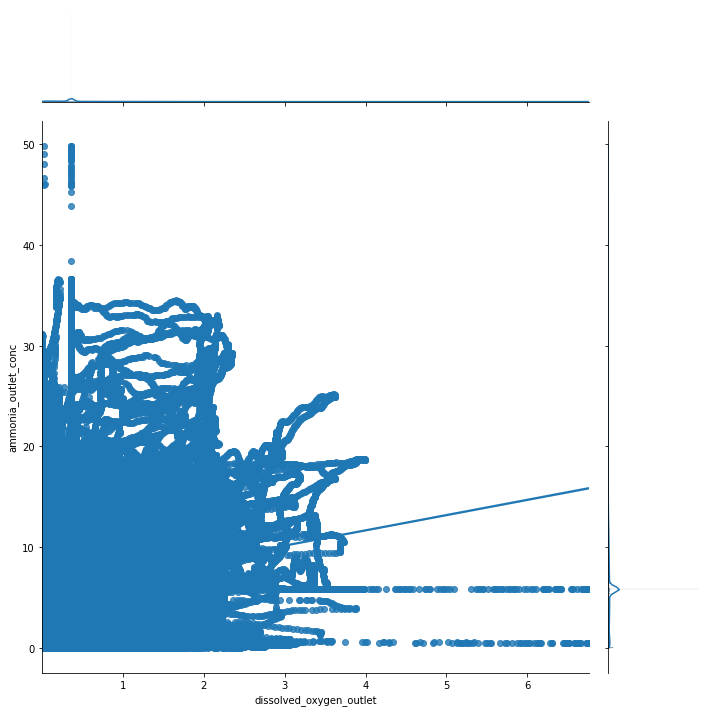

In [10]:
# Plotting the dissolved_oxygen_outlet and ammonia_outlet_concentration
sns.jointplot(x='dissolved_oxygen_outlet',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

It is evident that more the dissolved_oxygen_outlet, less will be ammonia_outlet_concentration

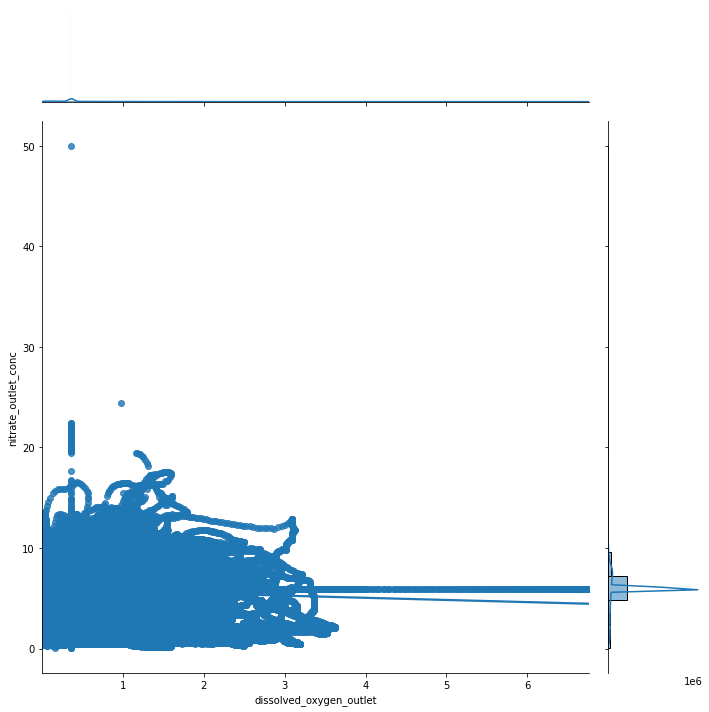

In [11]:
# Plot of dissolved_oxygen_outlet and nitrate_outlet_conc
sns.jointplot(x='dissolved_oxygen_outlet',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

It is clear that higher the value of dissolved_oxygen_outlet lower is the nitrate_outlet_concentration

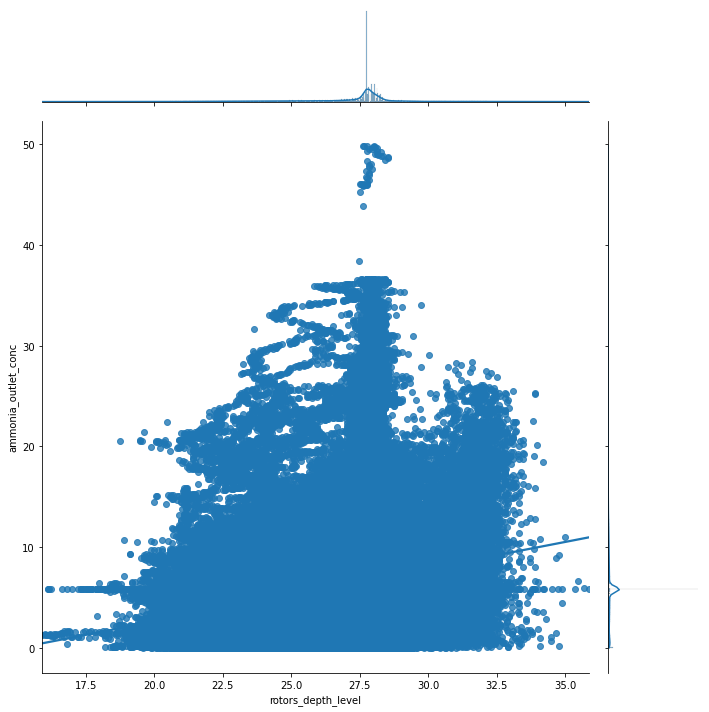

In [12]:
# Plot of ammonia_oulet_concetration and rotors_depth_level
sns.jointplot(x='rotors_depth_level',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that rotors_depth_level doesnot have much significance on ammonia_outlet_concentration as ammonia_outlet_concentration is fairly distributed along the different rotors_depth_level 

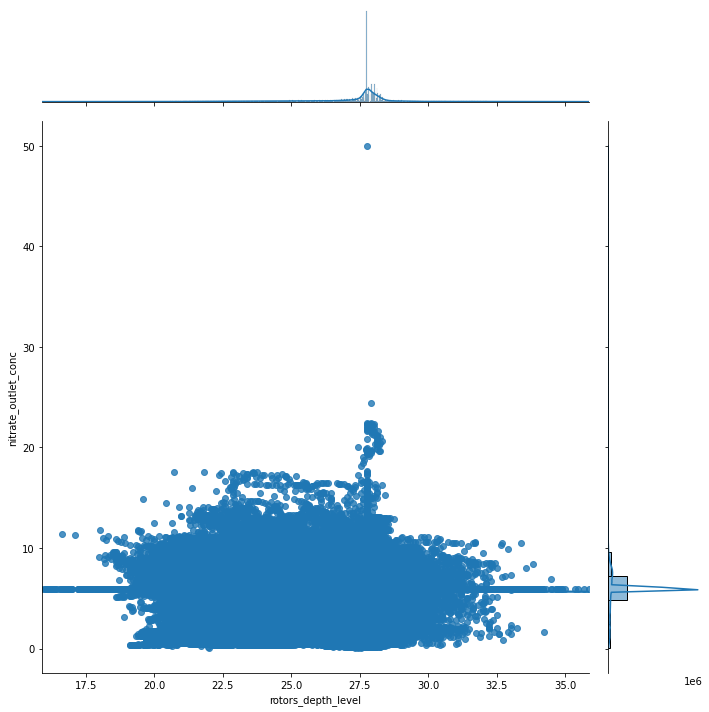

In [13]:
# # Plot of nitrate_oulet_concetration and rotors_depth_level
sns.jointplot(x='rotors_depth_level',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that rotors_depth_level does not have much significance on nitrate_outlet_concentration as nitrate_outlet_concentration is fairly distributed along the different rotors_depth_level

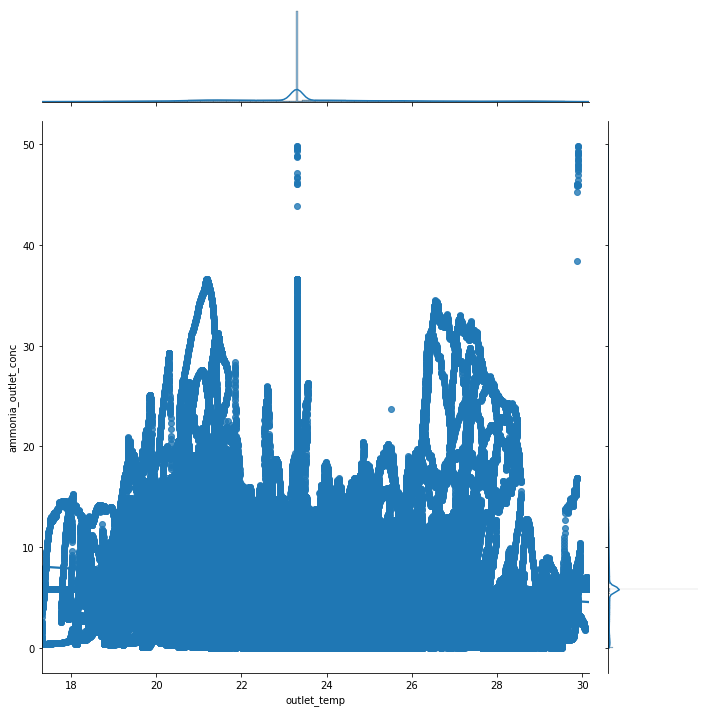

In [14]:
# Plotting ammonia_outlet_conc and outlet_temp
sns.jointplot(x='outlet_temp',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that outlet_level doesnot have much significance on ammonia_outlet_concentration as ammonia_outlet_concentration is fairly distributed along the different outlet_temp

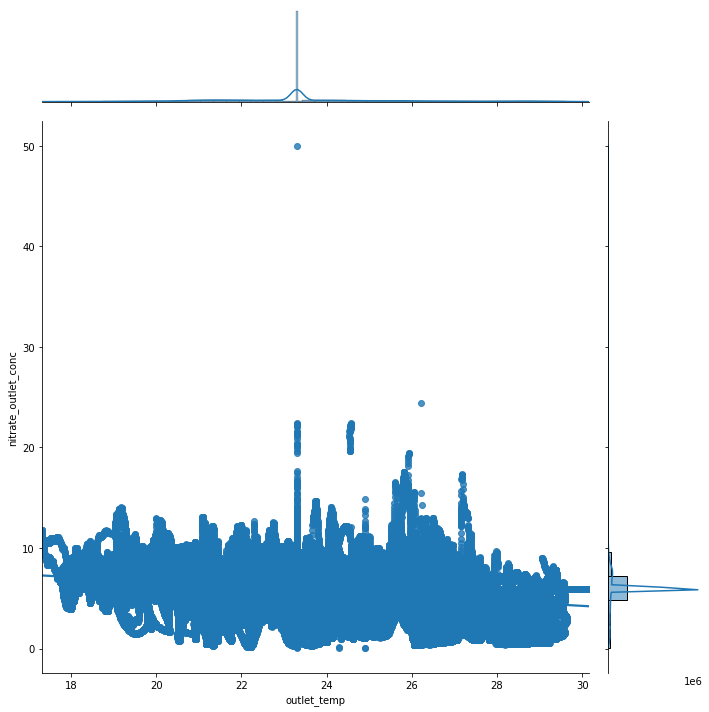

In [15]:
# Plotting the nitrate_outlet_conc and output_temp
sns.jointplot(x='outlet_temp',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that outlet_level doesnot have much significance on ammonia_outlet_concentration as ammonia_outlet_concentration is fairly distributed along the different outlet_temp

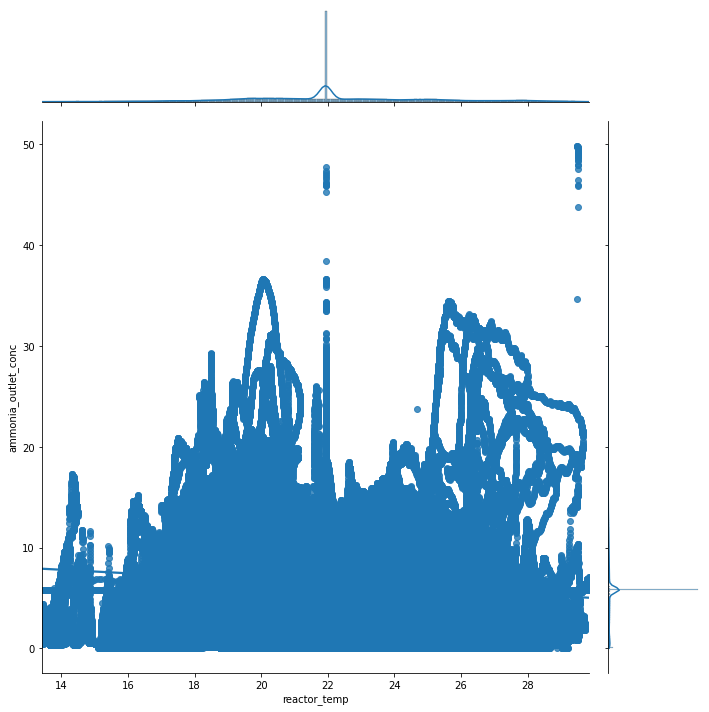

In [16]:
# Plot of reactor_temp and ammonia_outlet_conc
sns.jointplot(x='reactor_temp',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that reactor_temp doesnot have much significance on ammonia_outlet_concentration as ammonia_outlet_concentration is fairly distributed along the different reactor_temp

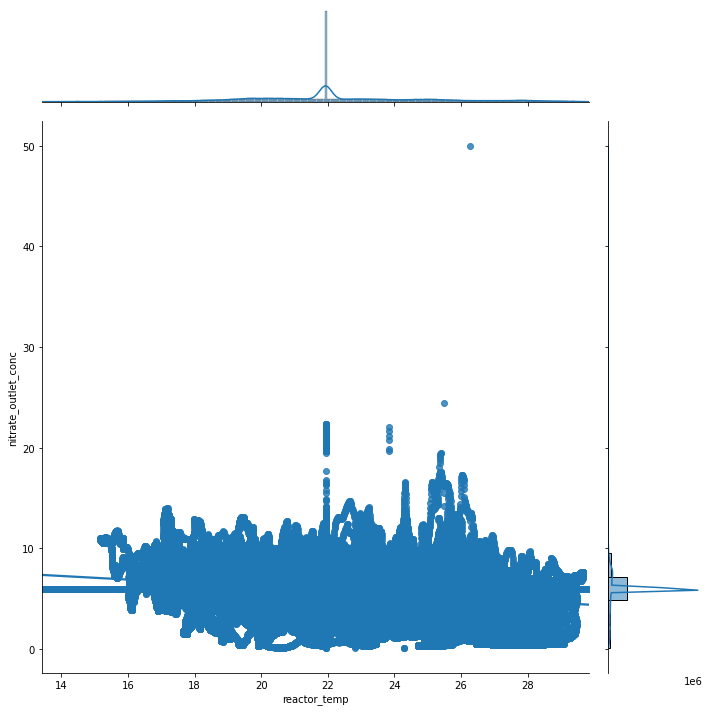

In [17]:
# Plot of nitrate_temp and nitrate_outlet_conc
sns.jointplot(x='reactor_temp',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that reactor_temp doesnot have much significance on nitrate_outlet_concentration as nitrate_outlet_concentration is fairly distributed along the different reactor_temp

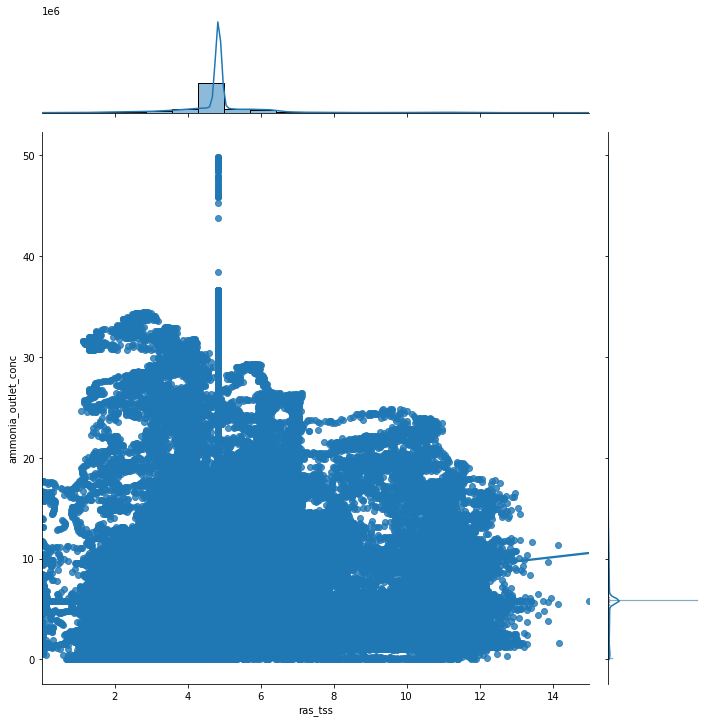

In [18]:
# Plotting ras_tss and ammonia_outlet_conc
sns.jointplot(x='ras_tss',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that rss_tss(Return activated sludge - total suspended solid) doesnot have much significance on ammonia_outlet_concentration as ammonia_outlet_concentration is fairly distributed along the different rss_tas

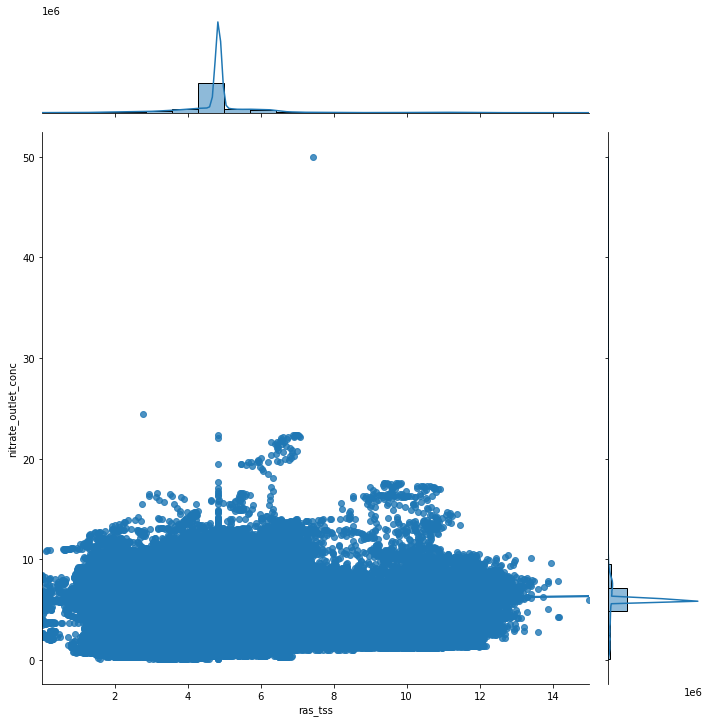

In [19]:
# Plotting nitrate_outlet_conc and ras_tss
sns.jointplot(x='ras_tss',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that rss_tss(Return activated sludge - total suspended solid) doesnot have much significance on nitrate_outlet_concentration as nitrate_outlet_concentration is fairly distributed along the different rss_tas

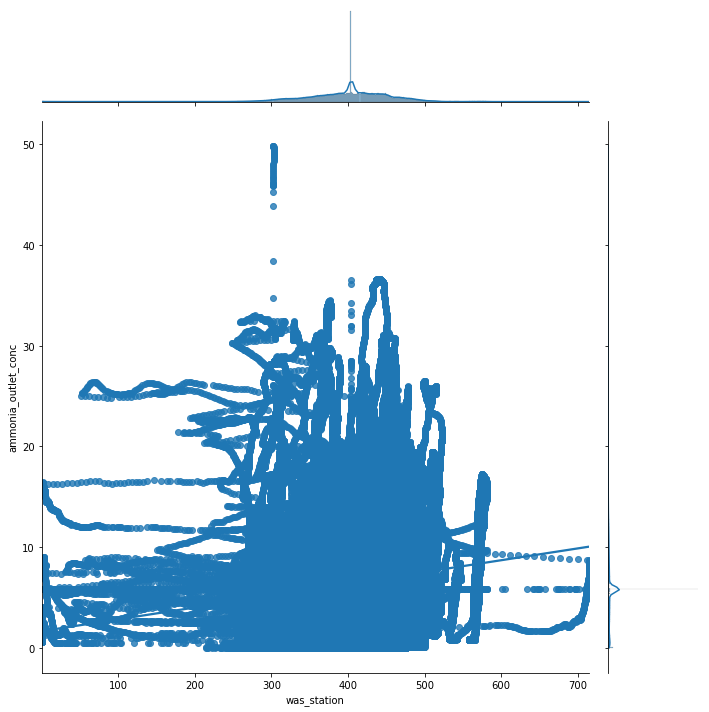

In [20]:
# Plotting ammonia outlet_conc and was_station
sns.jointplot(x='was_station',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that ammonia_oulet_conc has highest value for was_station(Waste activated sludge flow rate) in range of 220 to 510.

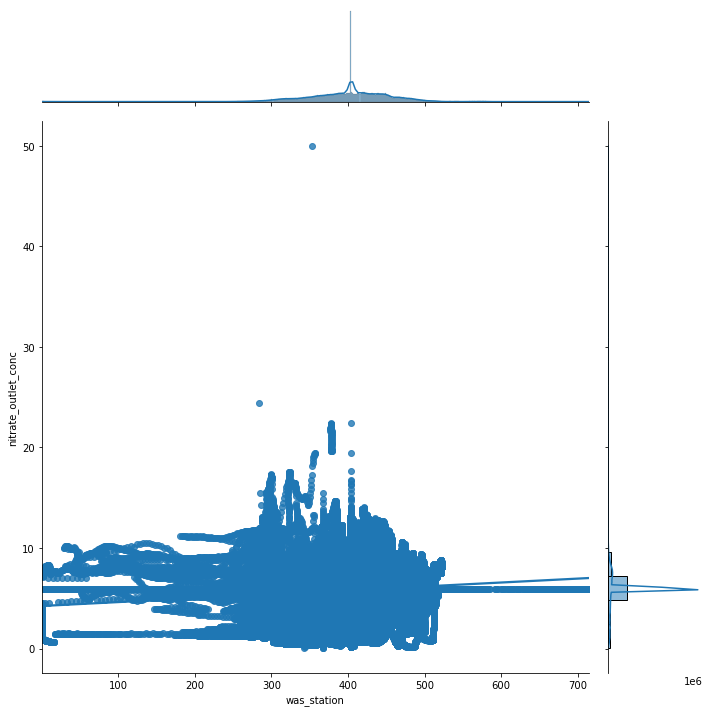

In [21]:
# Plotting the was_station and nitrate_outlet_conc
sns.jointplot(x='was_station',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that ammonia_oulet_conc has highest value for was_station(Waste activated sludge flow rate) in range of 230 to 510

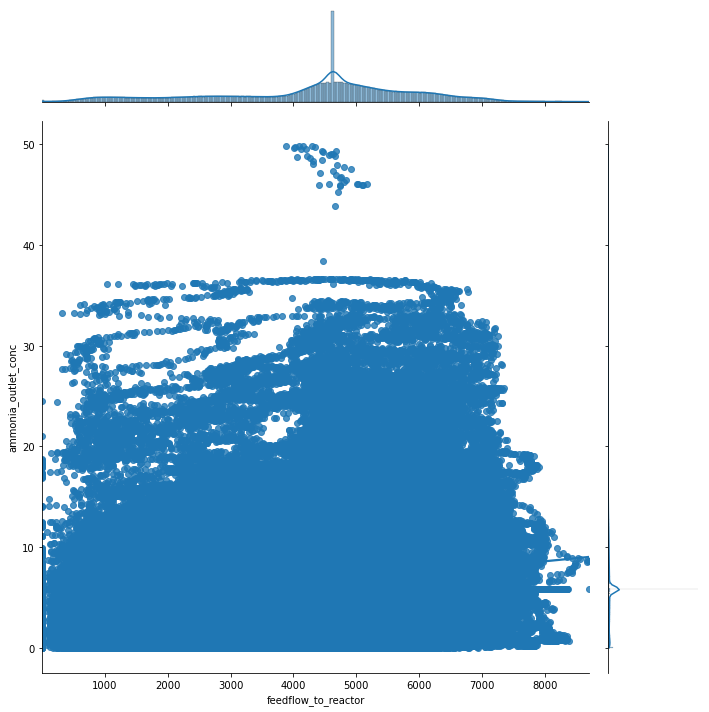

In [22]:
# Plotting feedlow_to_reactor and ammonia_outlet_conc
sns.jointplot(x='feedflow_to_reactor',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that feedflow_to_reactor does not have much significance on ammonia_outlet_concentration as ammonia_outlet_concentration is fairly distributed along the feedflow_to_reactor range.

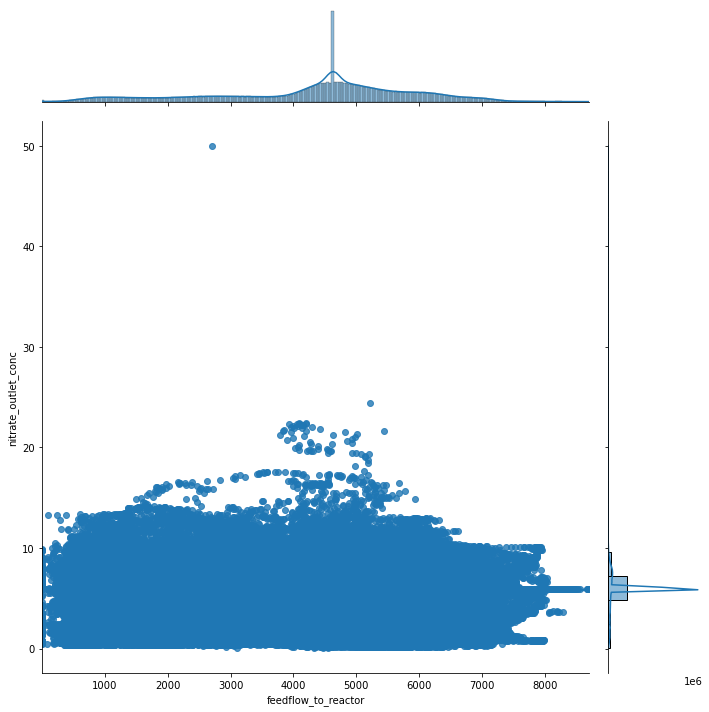

In [23]:
# Plotting feedlow_to_reactor and nitrate_outlet_conc
sns.jointplot(x='feedflow_to_reactor',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

From the graph, it can be concluded that feedflow_to_reactor does not have much significance on nitrate_outlet_concentration as nitrate_outlet_concentration is fairly distributed along the feedflow_to_reactor range.

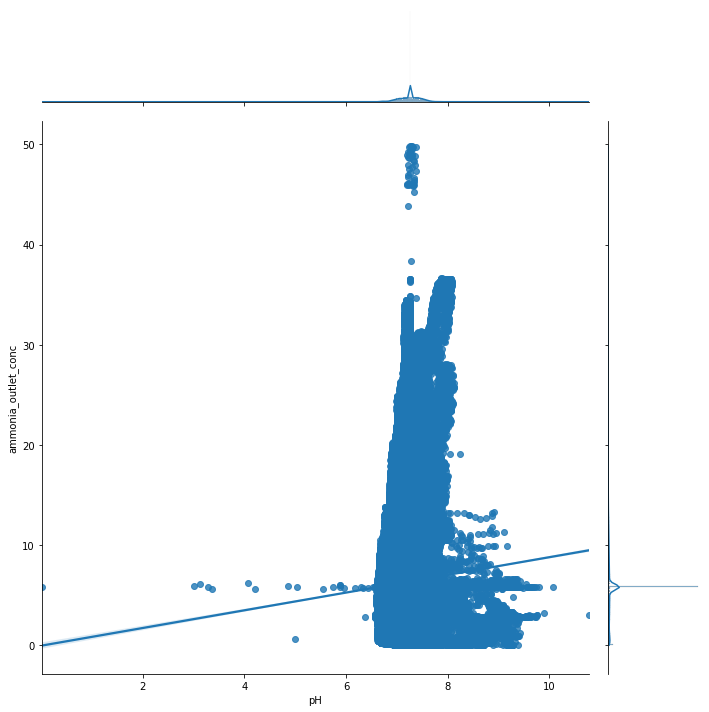

In [24]:
# Plotting pH and ammonia_outlet_conc 
sns.jointplot(x='pH',y='ammonia_outlet_conc', data=df, height=10, kind='reg')

It is clear that high ammonia_outlet_conc can be found when pH value sid between 7 and 8

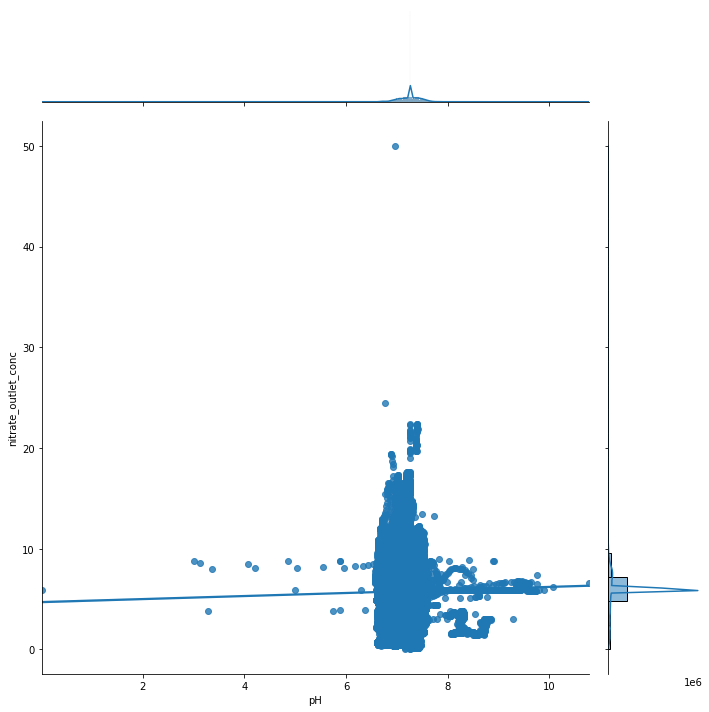

In [25]:
# Plotting pH and nitrate_outlet_conc 
sns.jointplot(x='pH',y='nitrate_outlet_conc', data=df, height=10, kind='reg')

It is evident that high nitrate_outlet_conc is present when pH value id around 7

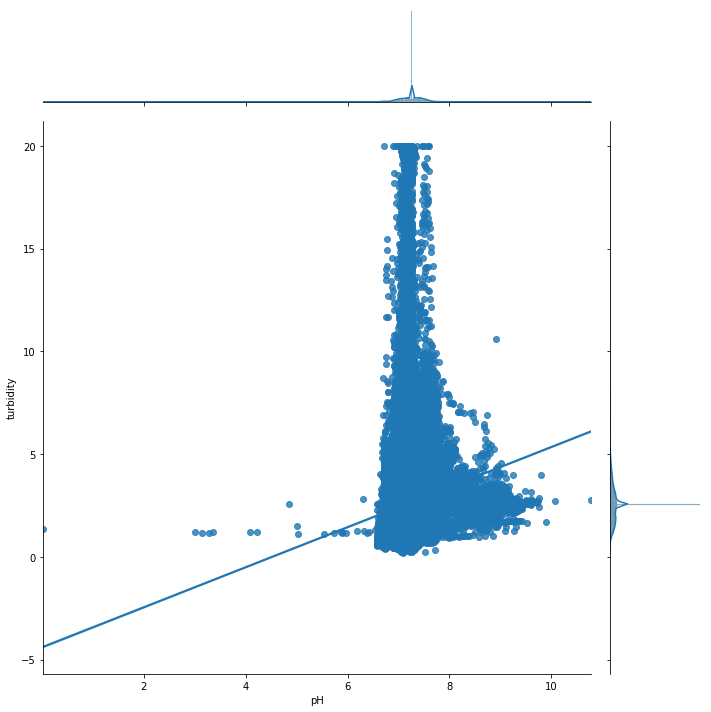

In [26]:
# Plotting pH and turbidity
sns.jointplot(x='pH',y='turbidity', data=df, height=10, kind='reg')

Turbidity is maximum for pH value ranging from 6.5 and 7.5

In [27]:
# Generate pair plot of  all the columns
#sns.pairplot(df)

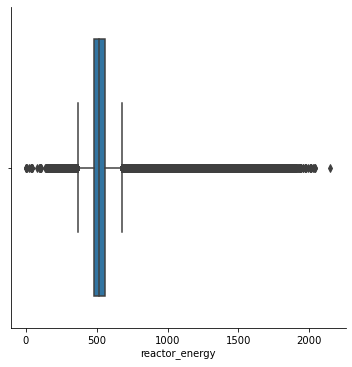

In [28]:
# Box plt for reacor_energy
sns.catplot(x='reactor_energy', kind='box',data=df)

It is clear that about 75% of the reactor_energy is below 800 KWh with only about 10% of the values above 1000 KWh

In [29]:
# Getting description of data
df.describe()

,reactor_energy,dissolved_oxygen,dissolved_oxygen_outlet,rotors_depth_level,turbidity,outlet_temp,reactor_temp,ras_tss,was_station,feedflow_to_reactor,raw_sewage_conductivity,raw_sewage_tss,pH,b11_flowmeter,ammonia_outlet_conc,nitrate_outlet_conc
count,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000,877464.000000
mean,555.578670,0.597022,0.505089,27.130749,2.673526,23.502143,22.141372,4.938821,401.430437,4358.381807,1337.121624,1064.602318,7.261908,829.545855,6.375006,5.792129
std,208.417514,0.343736,0.494418,1.819929,1.159555,2.155305,2.782296,1.248633,53.076383,1569.054370,650.655981,3157.948748,0.227479,141.874773,4.278192,1.589717
min,2.000000,0.002000,0.001000,15.892000,0.190000,17.313000,13.411000,0.004000,0.062000,1.000000,0.001000,10.330000,0.017000,4.000000,0.012000,0.073000
25%,483.000000,0.437000,0.309000,26.870000,1.949000,22.248000,20.387000,4.841000,372.090750,3520.000000,1249.025000,439.933000,7.128000,824.000000,4.029000,5.946000
50%,520.000000,0.569000,0.366000,27.751000,2.565000,23.298000,21.930000,4.841000,404.409000,4629.000000,1339.601000,464.343000,7.262000,848.000000,5.812000,5.946000
75%,561.000000,0.698000,0.433000,28.020000,3.136000,24.338000,23.701000,4.841000,435.412000,5374.000000,1429.926000,493.048000,7.391000,864.000000,7.729000,5.946000
max,2148.000000,9.897000,6.762000,35.868000,20.000000,30.162000,29.847000,14.996000,715.027000,8698.000000,290187.094000,53457.055000,10.783000,1256.000000,49.853000,50.000000


In [30]:
#sns.catplot(x='dissolved_oxygen', kind='box',data=df)

In [31]:
#sns.catplot(x='dissolved_oxygen_outlet', kind='box',data=df)

In [32]:
#sns.catplot(x='rotors_depth_level', kind='box',data=df)

In [33]:
#sns.catplot(x='turbidity', kind='box',data=df)

In [34]:
#sns.displot(df['turbidity'],kde=False)

((array([-4.80085621, -4.6201345 , -4.52240101, ...,  4.52240101,
          4.6201345 ,  4.80085621]),
  array([2.000e+00, 2.000e+00, 3.000e+00, ..., 2.040e+03, 2.042e+03,
         2.148e+03])),
 (180.38751994462172, 555.5786698941495, 0.865505781598446))

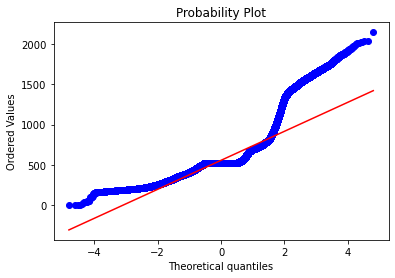

In [35]:
# Drawing probability plot of reactor_energy column
stats.probplot(df['reactor_energy'], dist='norm', plot=pylab)

It is evident that reactor_energy is not normally distributed. We will take log of all the columns as they are not normally distributed

In [36]:
# Taking log of all the columns and checking the data
df['reactor_energy'] = df['reactor_energy'].apply(lambda x: log(x))
df['dissolved_oxygen'] = df['dissolved_oxygen'].apply(lambda x: log(x))
df['dissolved_oxygen_outlet'] = df['dissolved_oxygen_outlet'].apply(lambda x: log(x))
df['rotors_depth_level'] = df['rotors_depth_level'].apply(lambda x: log(x))
df['turbidity'] = df['turbidity'].apply(lambda x: log(x))
df['outlet_temp'] = df['outlet_temp'].apply(lambda x: log(x))
df['reactor_temp'] = df['reactor_temp'].apply(lambda x: log(x))
df['ras_tss'] = df['ras_tss'].apply(lambda x: log(x))
df['was_station'] = df['was_station'].apply(lambda x: log(x))
df['feedflow_to_reactor'] = df['feedflow_to_reactor'].apply(lambda x: log(x))
df['raw_sewage_conductivity'] = df['raw_sewage_conductivity'].apply(lambda x: log(x))
df['raw_sewage_tss'] = df['raw_sewage_tss'].apply(lambda x: log(x))
df['pH'] = df['pH'].apply(lambda x: log(x))
df['b11_flowmeter'] = df['b11_flowmeter'].apply(lambda x: log(x))
df['ammonia_outlet_conc'] = df['ammonia_outlet_conc'].apply(lambda x: log(x))
df['nitrate_outlet_conc'] = df['nitrate_outlet_conc'].apply(lambda x: log(x))


df.head()

,reactor_energy,dissolved_oxygen,dissolved_oxygen_outlet,rotors_depth_level,turbidity,outlet_temp,reactor_temp,ras_tss,was_station,feedflow_to_reactor,raw_sewage_conductivity,raw_sewage_tss,pH,b11_flowmeter,ammonia_outlet_conc,nitrate_outlet_conc
0,6.253829,-0.563875,-1.005122,3.323272,0.941958,3.148368,3.087856,1.577121,6.002427,8.440096,7.200127,6.140624,1.982655,6.742881,1.759925,1.782719
1,6.508769,-0.916291,0.706063,3.323272,0.664748,3.270063,3.229618,2.369589,5.922589,8.697179,6.889042,6.116709,1.940323,6.131226,2.309859,1.486140
2,6.492240,-0.903868,-1.005122,3.340739,0.594431,3.270025,3.229499,2.357263,5.922361,8.670944,6.891543,6.120322,1.939317,6.131226,2.315896,1.483421
3,6.519147,-0.563875,-1.005122,3.322371,0.564177,3.269949,3.229420,2.375464,5.922289,8.624073,6.892054,6.122624,1.938742,6.165418,2.323172,1.474992
4,6.486161,-1.005122,0.705570,3.323272,0.618424,3.269911,3.229341,2.375743,5.922085,8.682369,6.901016,6.130985,1.939317,6.779922,2.330298,1.472243


((array([-4.80085621, -4.6201345 , -4.52240101, ...,  4.52240101,
          4.6201345 ,  4.80085621]),
  array([0.69314718, 0.69314718, 1.09861229, ..., 7.62070509, 7.621685  ,
         7.67229246])),
 (0.30448788483121636, 6.264958705852859, 0.9463048078215541))

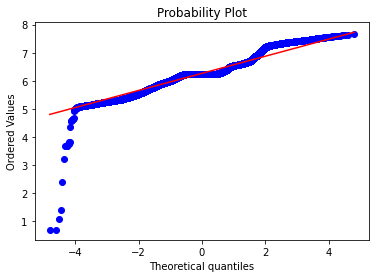

In [37]:
# Drawing probability plot of columns
stats.probplot(df['reactor_energy'], dist='norm', plot=pylab)

After transformation, the distribution for reactor_energy mostly resembles that of a normal distribution. This normality validation is important in order to fit the assumption of linear regression models.

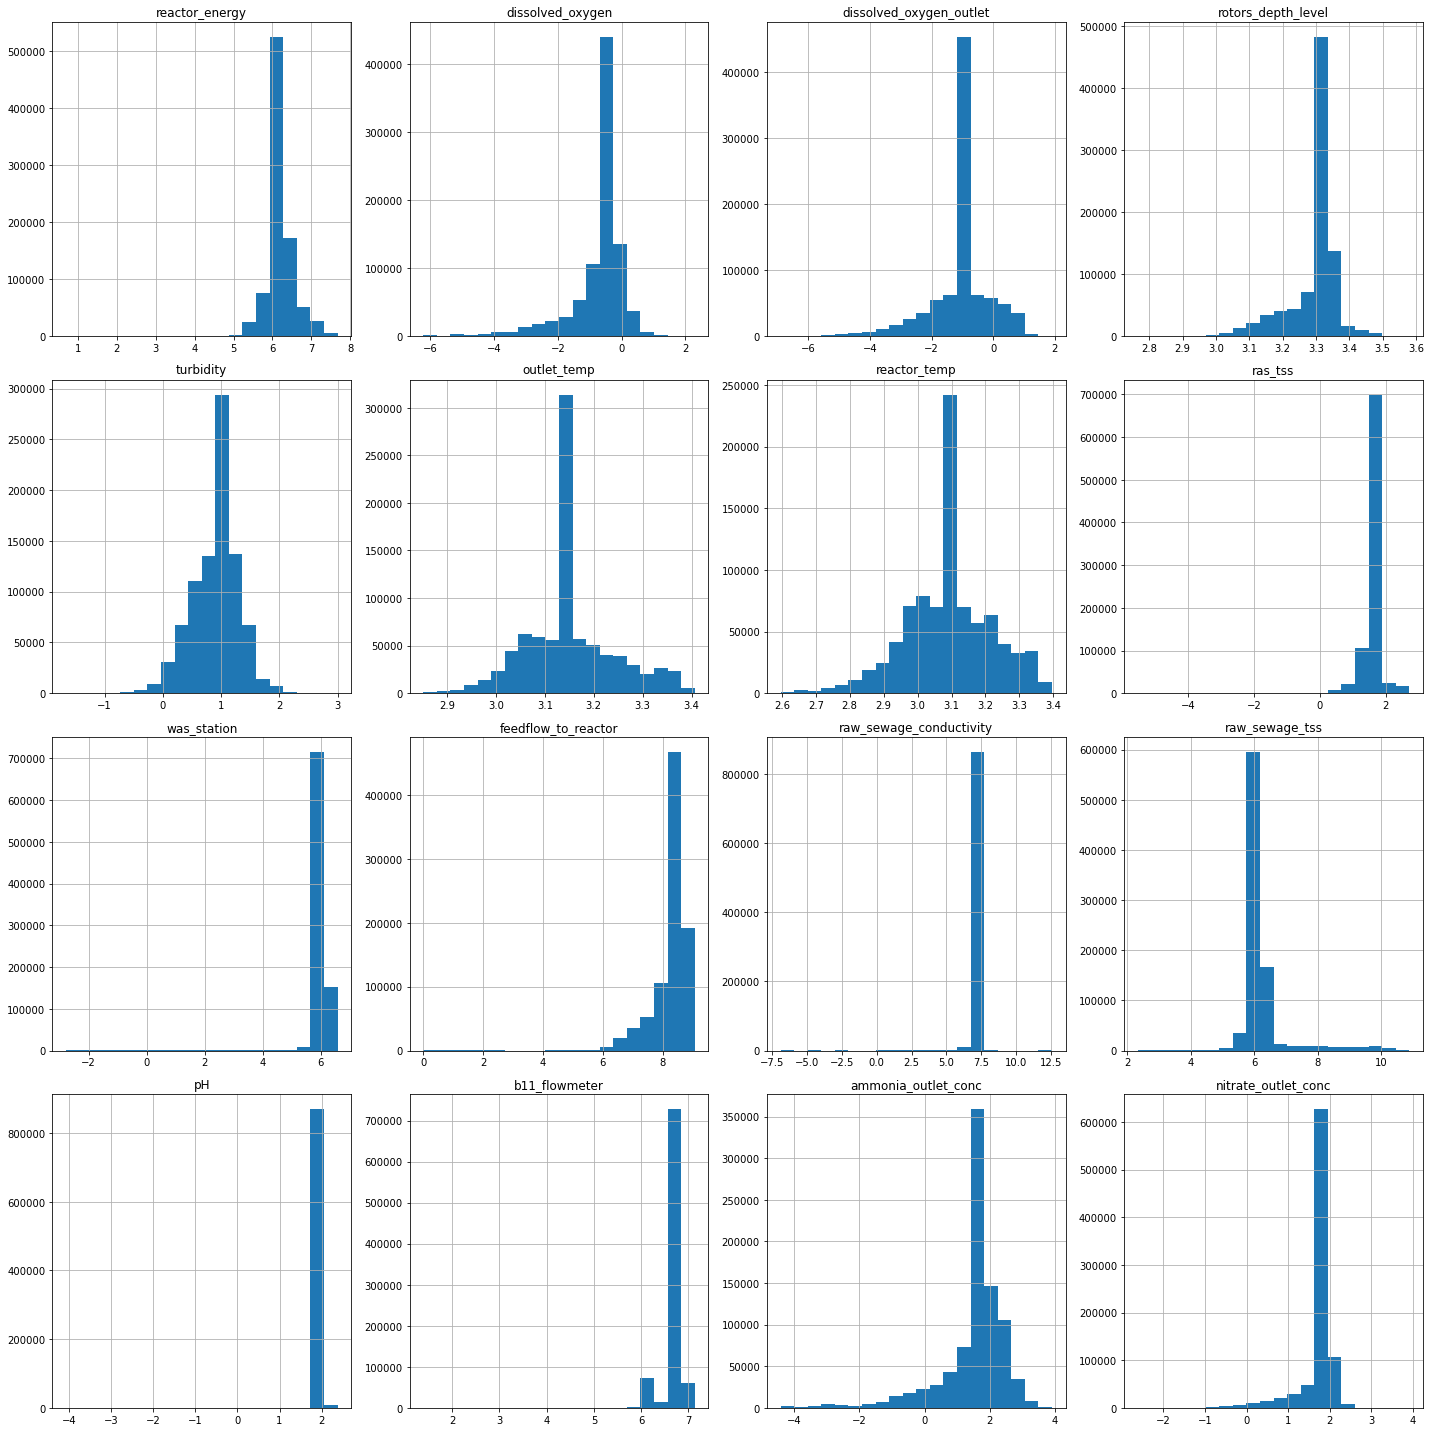

In [38]:
 # Plotting the histogram of the dataset
df.hist(figsize = (20, 20), bins = 20)
plt.tight_layout()

It can be seen that data in most of the columns are normally distributed or are close to normal distribution.

In [40]:
# Saving the dataframe
df.to_csv('./data/data_eda.csv', index = False)